## Business Case: To create a system that helps detect breast cancer early using machine learning, so that doctors can make faster and more accurate decisions

In [70]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Load Dataset

data = pd.read_csv('breast-cancer.csv')

In [72]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


## Domain Analysis of each and every column

In [74]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

id – Unique identifier for each patient/sample.

diagnosis – Indicates whether the tumor is benign (B) or malignant (M).

radius_mean – Average distance from center to points on the perimeter.

texture_mean – Variation in gray-scale intensity (smoothness of the mass).

perimeter_mean – Mean size of the tumor boundary.

area_mean – Average area covered by the tumor.

smoothness_mean – Measures the smoothness of the tumor edges.

compactness_mean – Degree to which the mass is tightly packed.

concavity_mean – Severity of concave (inward-curving) portions of the tumor.

concave points_mean – Number of concave portions in the tumor contour.

symmetry_mean – How symmetrical the tumor shape is.

fractal_dimension_mean – Complexity of the tumor boundary.

radius_se – Standard error of radius; variation in radius values.

texture_se – Standard error of texture.

perimeter_se – Standard error of perimeter.

area_se – Standard error of area.

smoothness_se – Standard error of smoothness.

compactness_se – Standard error of compactness.

concavity_se – Standard error of concavity.

concave points_se – Standard error of concave points.

symmetry_se – Standard error of symmetry.

fractal_dimension_se – Standard error of fractal dimension.

radius_worst – Largest (worst) radius value.

texture_worst – Largest (worst) texture value.

perimeter_worst – Largest (worst) perimeter value.

area_worst – Largest (worst) area value.

smoothness_worst – Largest (worst) smoothness value.

compactness_worst – Largest (worst) compactness value.

concavity_worst – Largest (worst) concavity value.

concave points_worst – Largest (worst) concave points count.

symmetry_worst – Largest (worst) symmetry value.

fractal_dimension_worst – Largest (worst) fractal dimension.

## Exploratory Data Analysis

In [75]:
pd.set_option('display.max_columns', None)  # It doesnt truncate the columns

In [76]:
# Statistics

data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Insights

No Missing Data
➤ All columns have 569 values — the dataset is complete.

ID is Not Useful
➤ 'id' is just a unique number — it can be removed.

Tumor Size Varies a Lot
➤ radius_mean, area_mean, perimeter_mean have small to very large values.
➤ Some tumors are small, others are very large.

Edge Shape is Important
➤ concavity_mean and concave points_mean have many small values but also some large ones.
➤ Irregular shapes may be cancerous.

Worst Values Show Danger
➤ Features like area_worst, perimeter_worst, radius_worst are much bigger in some cases.
➤ These may be from malignant (dangerous) tumors.

Data is Not Balanced
➤ Some columns have very small minimum values and very big maximum values.
➤ This means the data is not evenly spread — may need to scale/normalize it.



In [77]:
data = data.drop('id', axis=1)

In [78]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


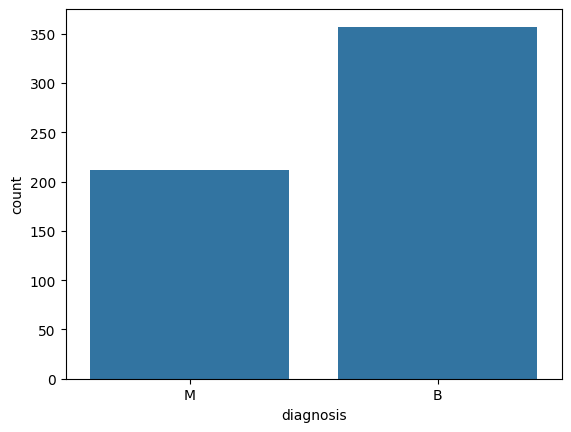

In [79]:
# Univariate Analysis

sns.countplot(x='diagnosis', data=data)
plt.show()

Insights

It means our data is imbalance

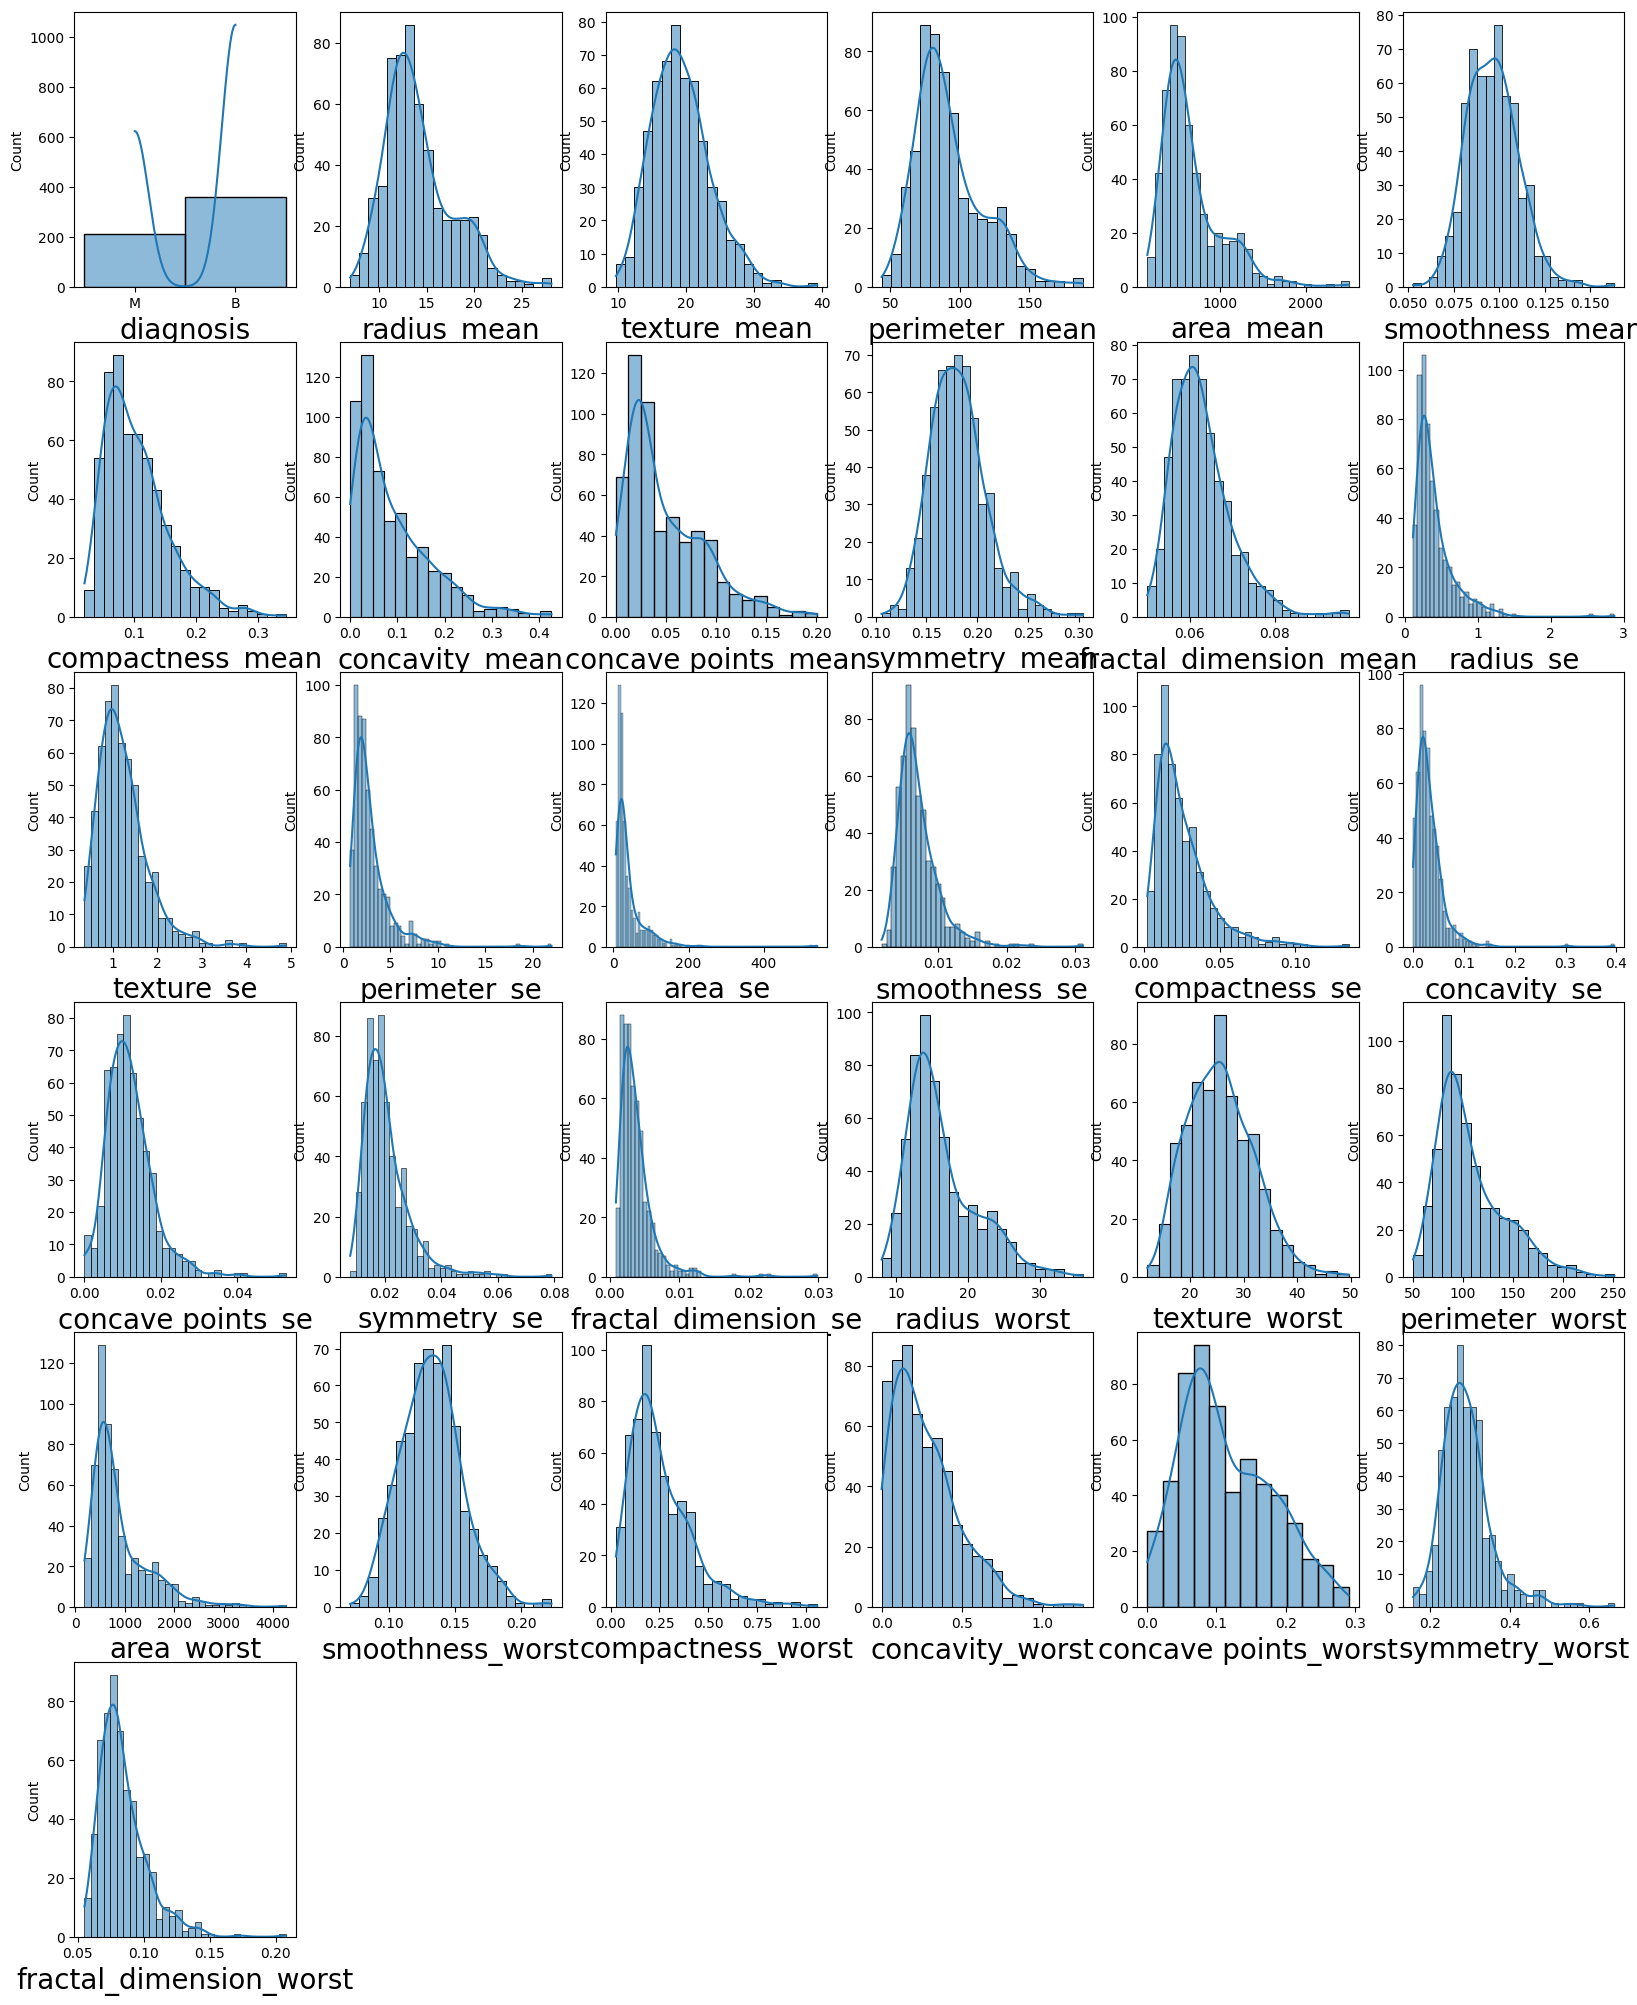

In [80]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=32 :
        ax = plt.subplot(6,6,plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

Insight 
Diagnosis	More benign than malignant cases (imbalanced dataset)

Size & Shape	Larger and more irregular tumors tend to be malignant

Worst-Case Features	High *_worst values are strong indicators of malignancy

Feature Distribution	Most features are right-skewed → use scaling/normalization

Next Step	Ready for feature selection, scaling, and building ML models 

In [81]:
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1}) 

In [82]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [83]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Insights
There is no null values in dataset

In [84]:
tc = data.corr()
tc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


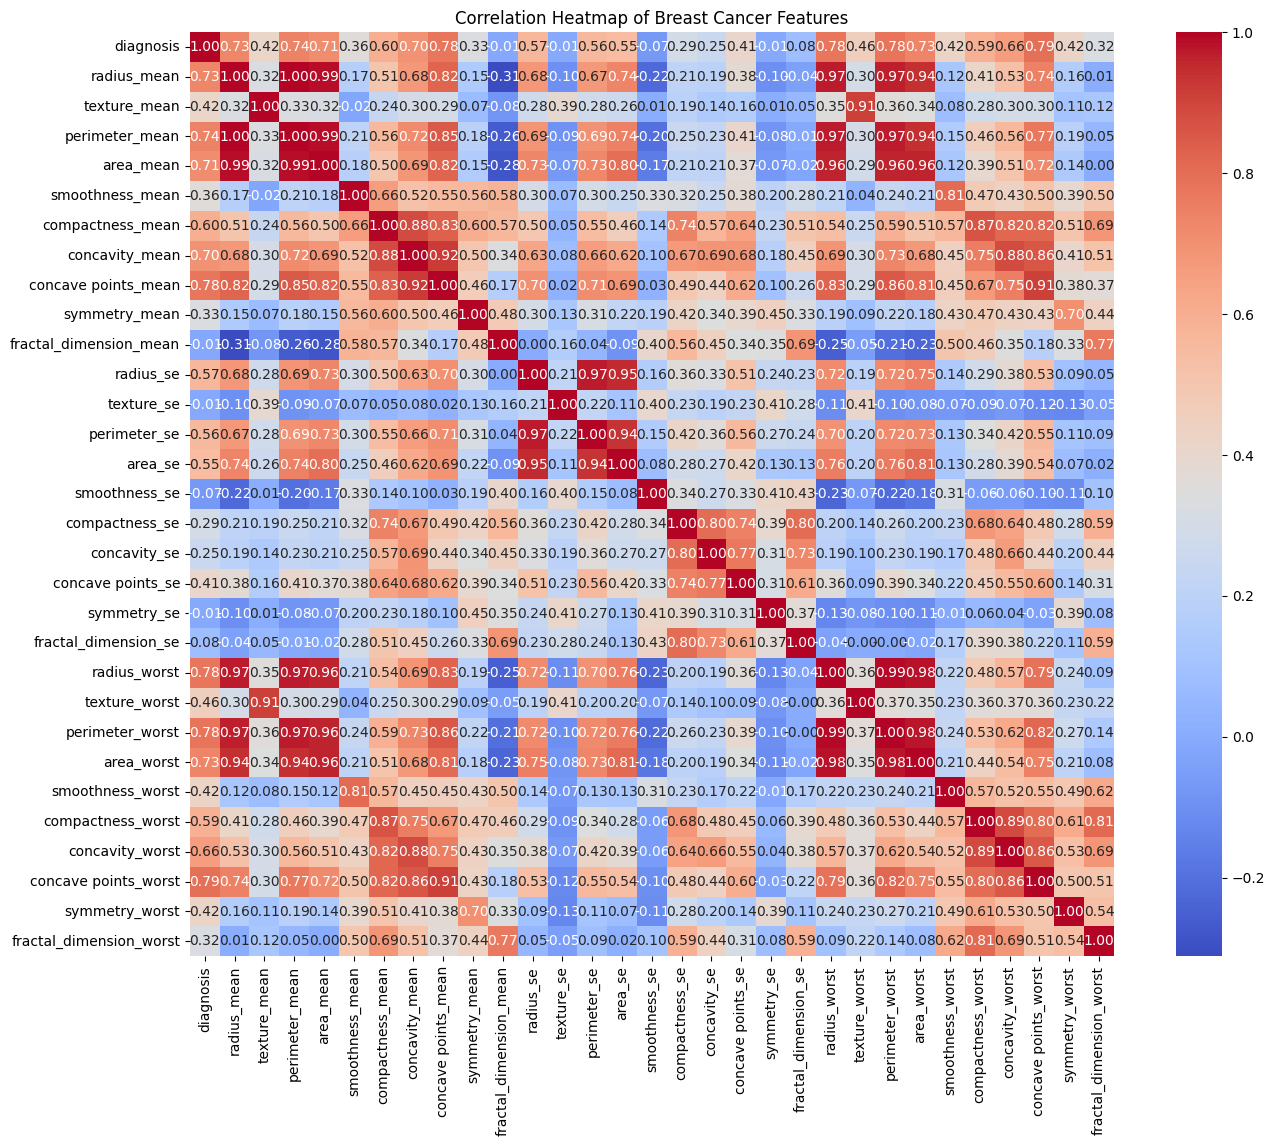

In [85]:
plt.figure(figsize=(16, 12))
sns.heatmap(tc, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

Reducing unwanted features

In [86]:
# Calculate the correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the features from the dataframe
reduced_data = data.drop(columns=to_drop)

print("Dropped columns:", to_drop)
print("Reduced dataset shape:", reduced_data.shape)


Dropped columns: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
Reduced dataset shape: (569, 21)


In [87]:
reduced_data.head(1)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.1184,0.2776,0.3001,0.2419,0.07871,1.095,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.1189


## Data Preprocessing and Feature Engineering

In [88]:
reduced_data.loc[reduced_data['radius_mean']==0]     # No corrupted data in radius_mean

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst


In [89]:
reduced_data.loc[reduced_data['texture_mean']==0]     # No corrupted data in texture_mean

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst


In [90]:
reduced_data.loc[reduced_data['smoothness_mean']==0]     # No corrupted data in smoothness_mean

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst


In [91]:
reduced_data.loc[reduced_data['compactness_mean']==0]     # No corrupted data in compactness_mean

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst


In [92]:
(reduced_data == 0).sum()       # It means concavity_mean, concavity_se, concave points_se, concavity_worst has corrupted value 


diagnosis                  357
radius_mean                  0
texture_mean                 0
smoothness_mean              0
compactness_mean             0
concavity_mean              13
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
smoothness_se                0
compactness_se               0
concavity_se                13
concave points_se           13
symmetry_se                  0
fractal_dimension_se         0
smoothness_worst             0
compactness_worst            0
concavity_worst             13
symmetry_worst               0
fractal_dimension_worst      0
dtype: int64

Replacing corrupted(0) with median

In [93]:
reduced_data['concavity_mean'].replace(0, np.median(reduced_data['concavity_mean']), inplace=True)
reduced_data['concavity_se'].replace(0, np.median(reduced_data['concavity_se']), inplace=True)
reduced_data['concave points_se'].replace(0, np.median(reduced_data['concave points_se']), inplace=True)
reduced_data['concavity_worst'].replace(0, np.median(reduced_data['concavity_worst']), inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_25540\1942812094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reduced_data['concavity_mean'].replace(0, np.median(reduced_data['concavity_mean']), inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_25540\1942812094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

Checking Outliers in dataset

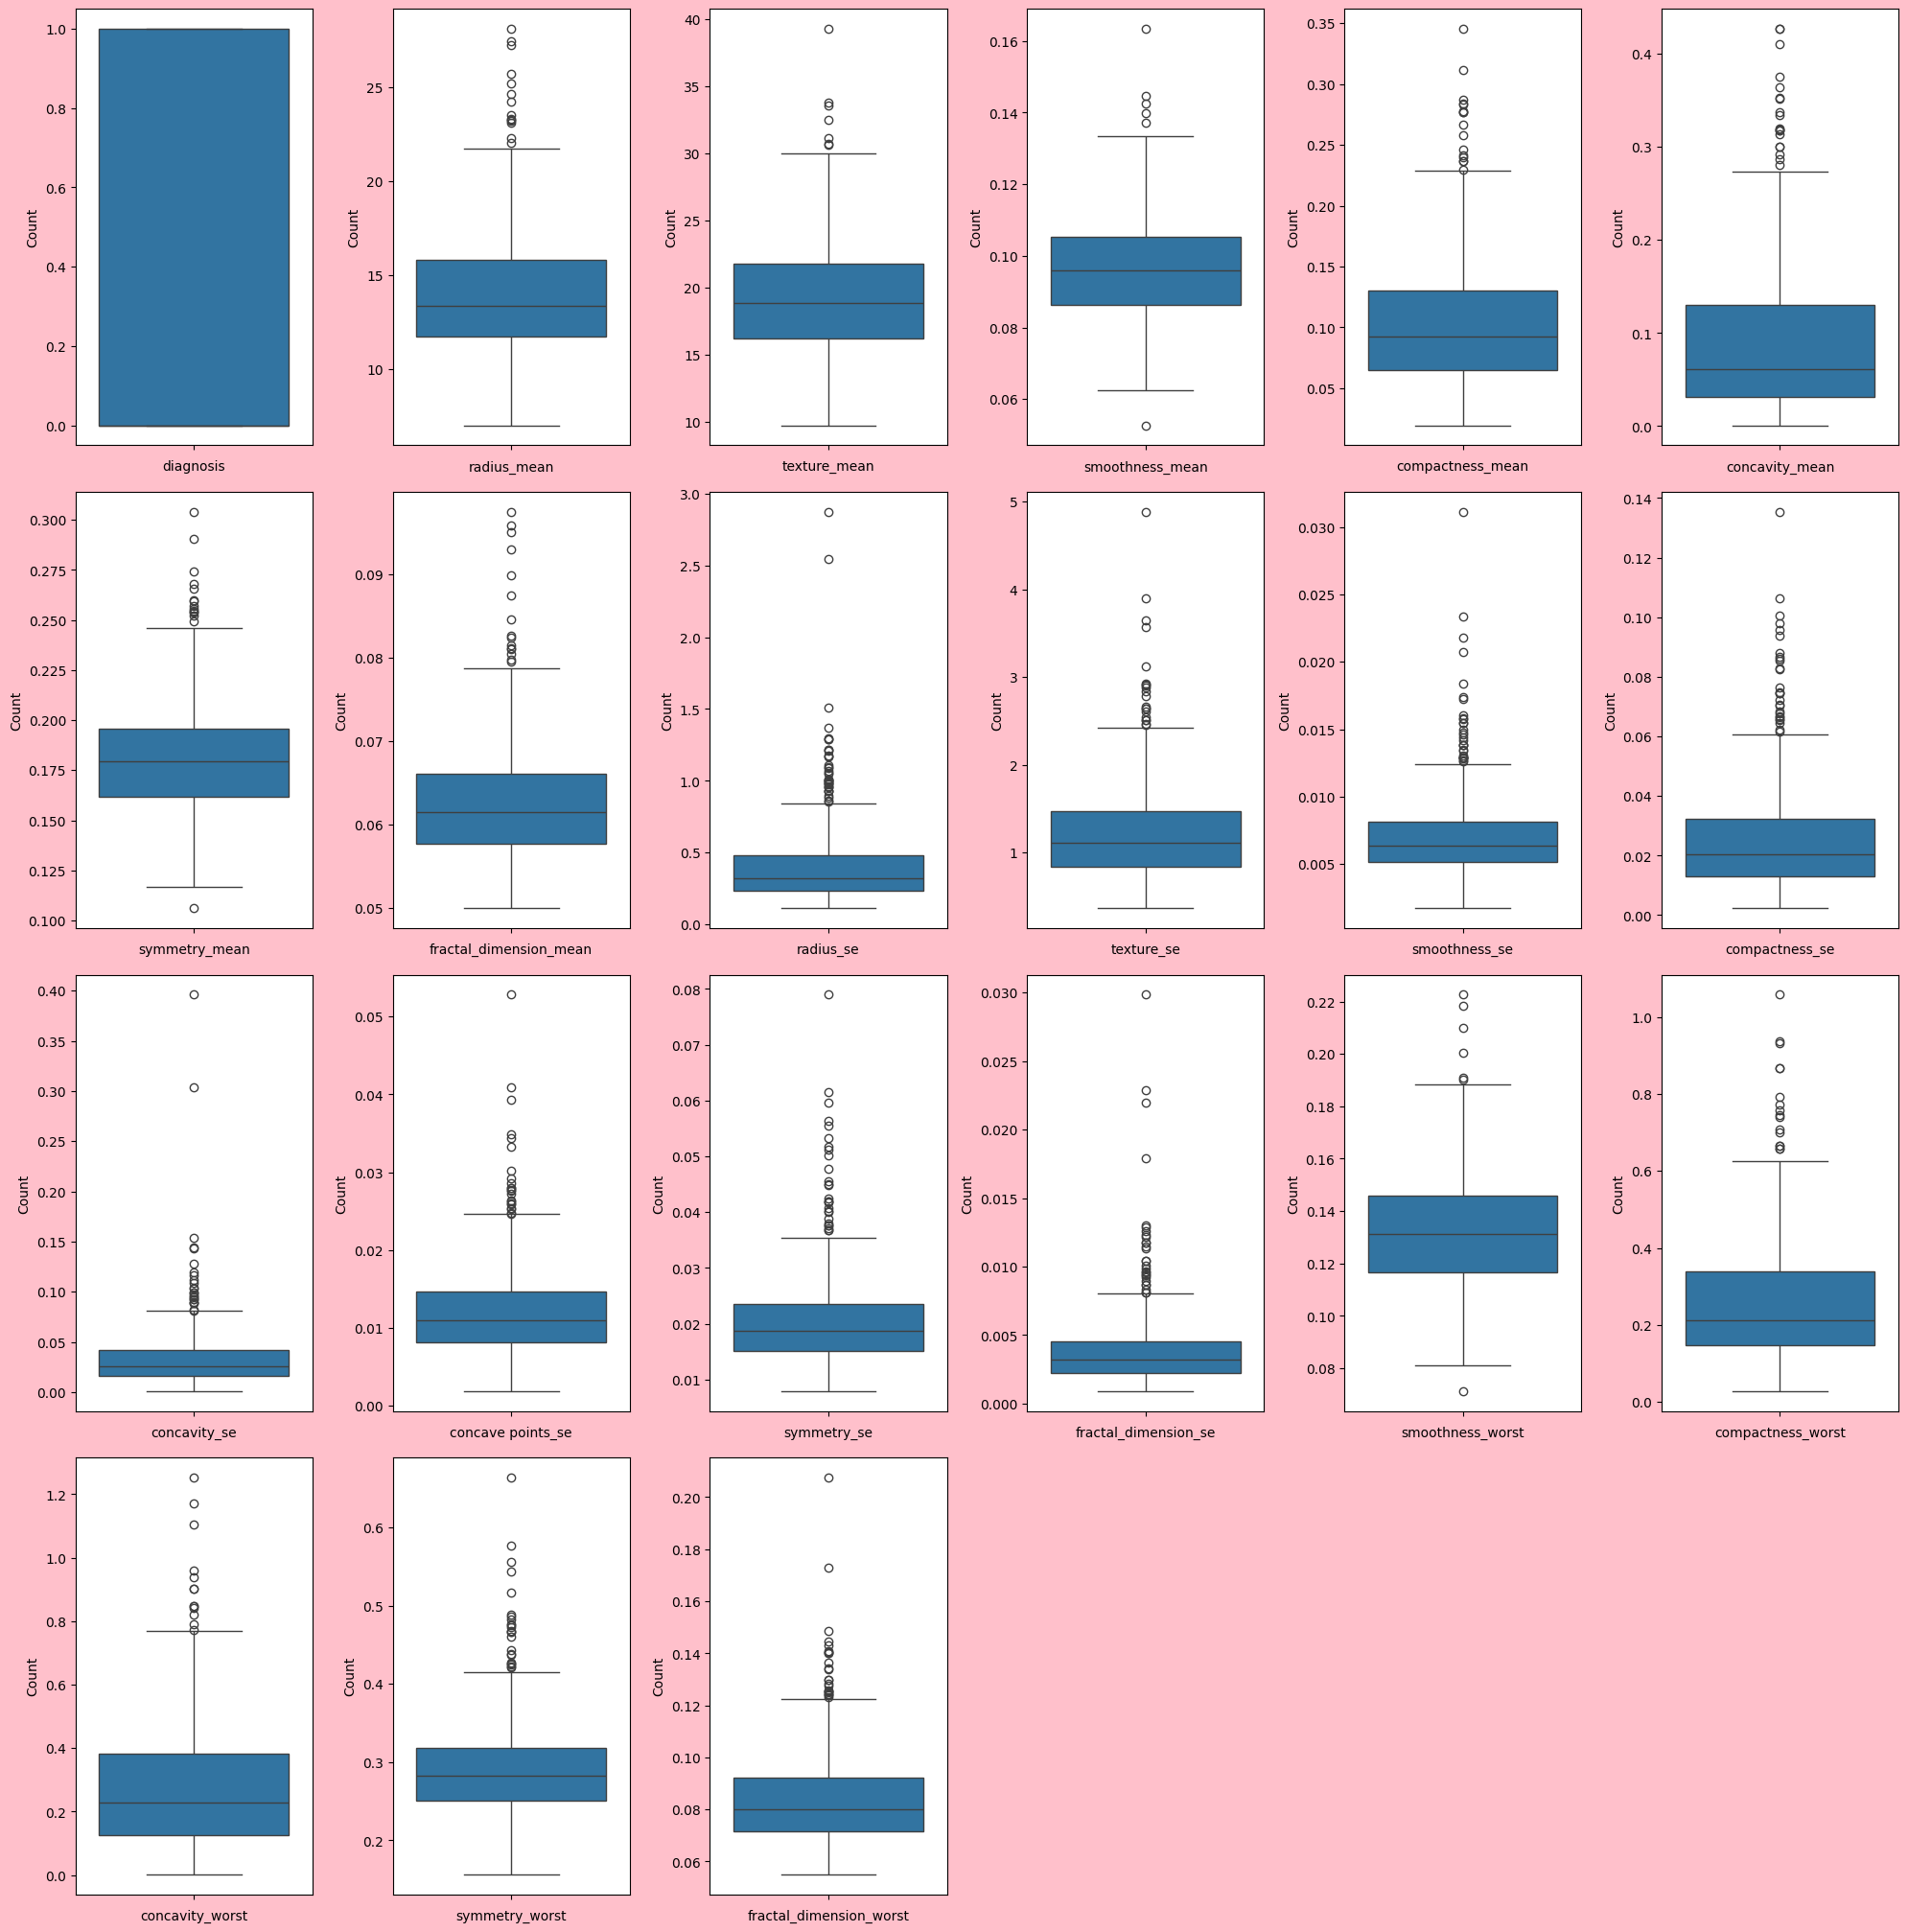

In [94]:
plt.figure(figsize=(20, 25), facecolor='pink')
plotnumber = 1

for column in reduced_data:
    if plotnumber<=21:
        ax=plt.subplot(5, 6, plotnumber)
        sns.boxplot(reduced_data[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
    plotnumber+=1
plt.tight_layout()

Insights

Its showing so many outliers in manny columns so need so handle it

Outlier handling using IQR capping (Winsorization) method

In [98]:

# Function to cap outliers using IQR method
def cap_outliers_iqr(reduced_data):
    capped_data = reduced_data.copy()
    for col in reduced_data.select_dtypes(include=np.number).columns:
        Q1 = reduced_data[col].quantile(0.25)     # 25th percentile
        Q3 = reduced_data[col].quantile(0.75)     # 75th percentile
        IQR = Q3 - Q1                   # Interquartile Range
        lower = Q1 - 1.5 * IQR          # Lower bound
        upper = Q3 + 1.5 * IQR          # Upper bound
        # Cap the values
        capped_data[col] = np.clip(reduced_data[col], lower, upper)
    return capped_data

# Apply the function to your dataset
capped_data = cap_outliers_iqr(reduced_data)

# Optional: Check how many values were capped in a sample column
# Example: capped_data['radius_mean'].value_counts()


In [99]:
capped_data

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.118400,0.22862,0.27971,0.2419,0.07871,0.84865,0.90530,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,0.16220,0.62695,0.71190,0.41915,0.11890
1,1,20.57,17.77,0.084740,0.07864,0.08690,0.1812,0.05667,0.54350,0.73390,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.24160,0.27500,0.08902
2,1,19.69,21.25,0.109600,0.15990,0.19740,0.2069,0.05999,0.74560,0.78690,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.45040,0.36130,0.08758
3,1,11.42,20.38,0.133695,0.22862,0.24140,0.2464,0.07875,0.49560,1.15600,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,0.19010,0.62695,0.68690,0.41915,0.12301
4,1,20.29,14.34,0.100300,0.13280,0.19800,0.1809,0.05883,0.75720,0.78130,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.40000,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.111000,0.11590,0.24390,0.1726,0.05623,0.84865,1.25600,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.41070,0.20600,0.07115
565,1,20.13,28.25,0.097800,0.10340,0.14400,0.1752,0.05533,0.76550,2.43415,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.32150,0.25720,0.06637
566,1,16.60,28.08,0.084550,0.10230,0.09251,0.1590,0.05648,0.45640,1.07500,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.34030,0.22180,0.07820
567,1,20.60,29.33,0.117800,0.22862,0.27971,0.2397,0.07016,0.72600,1.59500,0.006522,0.061505,0.07117,0.01664,0.02324,0.006185,0.16500,0.62695,0.77095,0.40870,0.12301


Outliers Removed

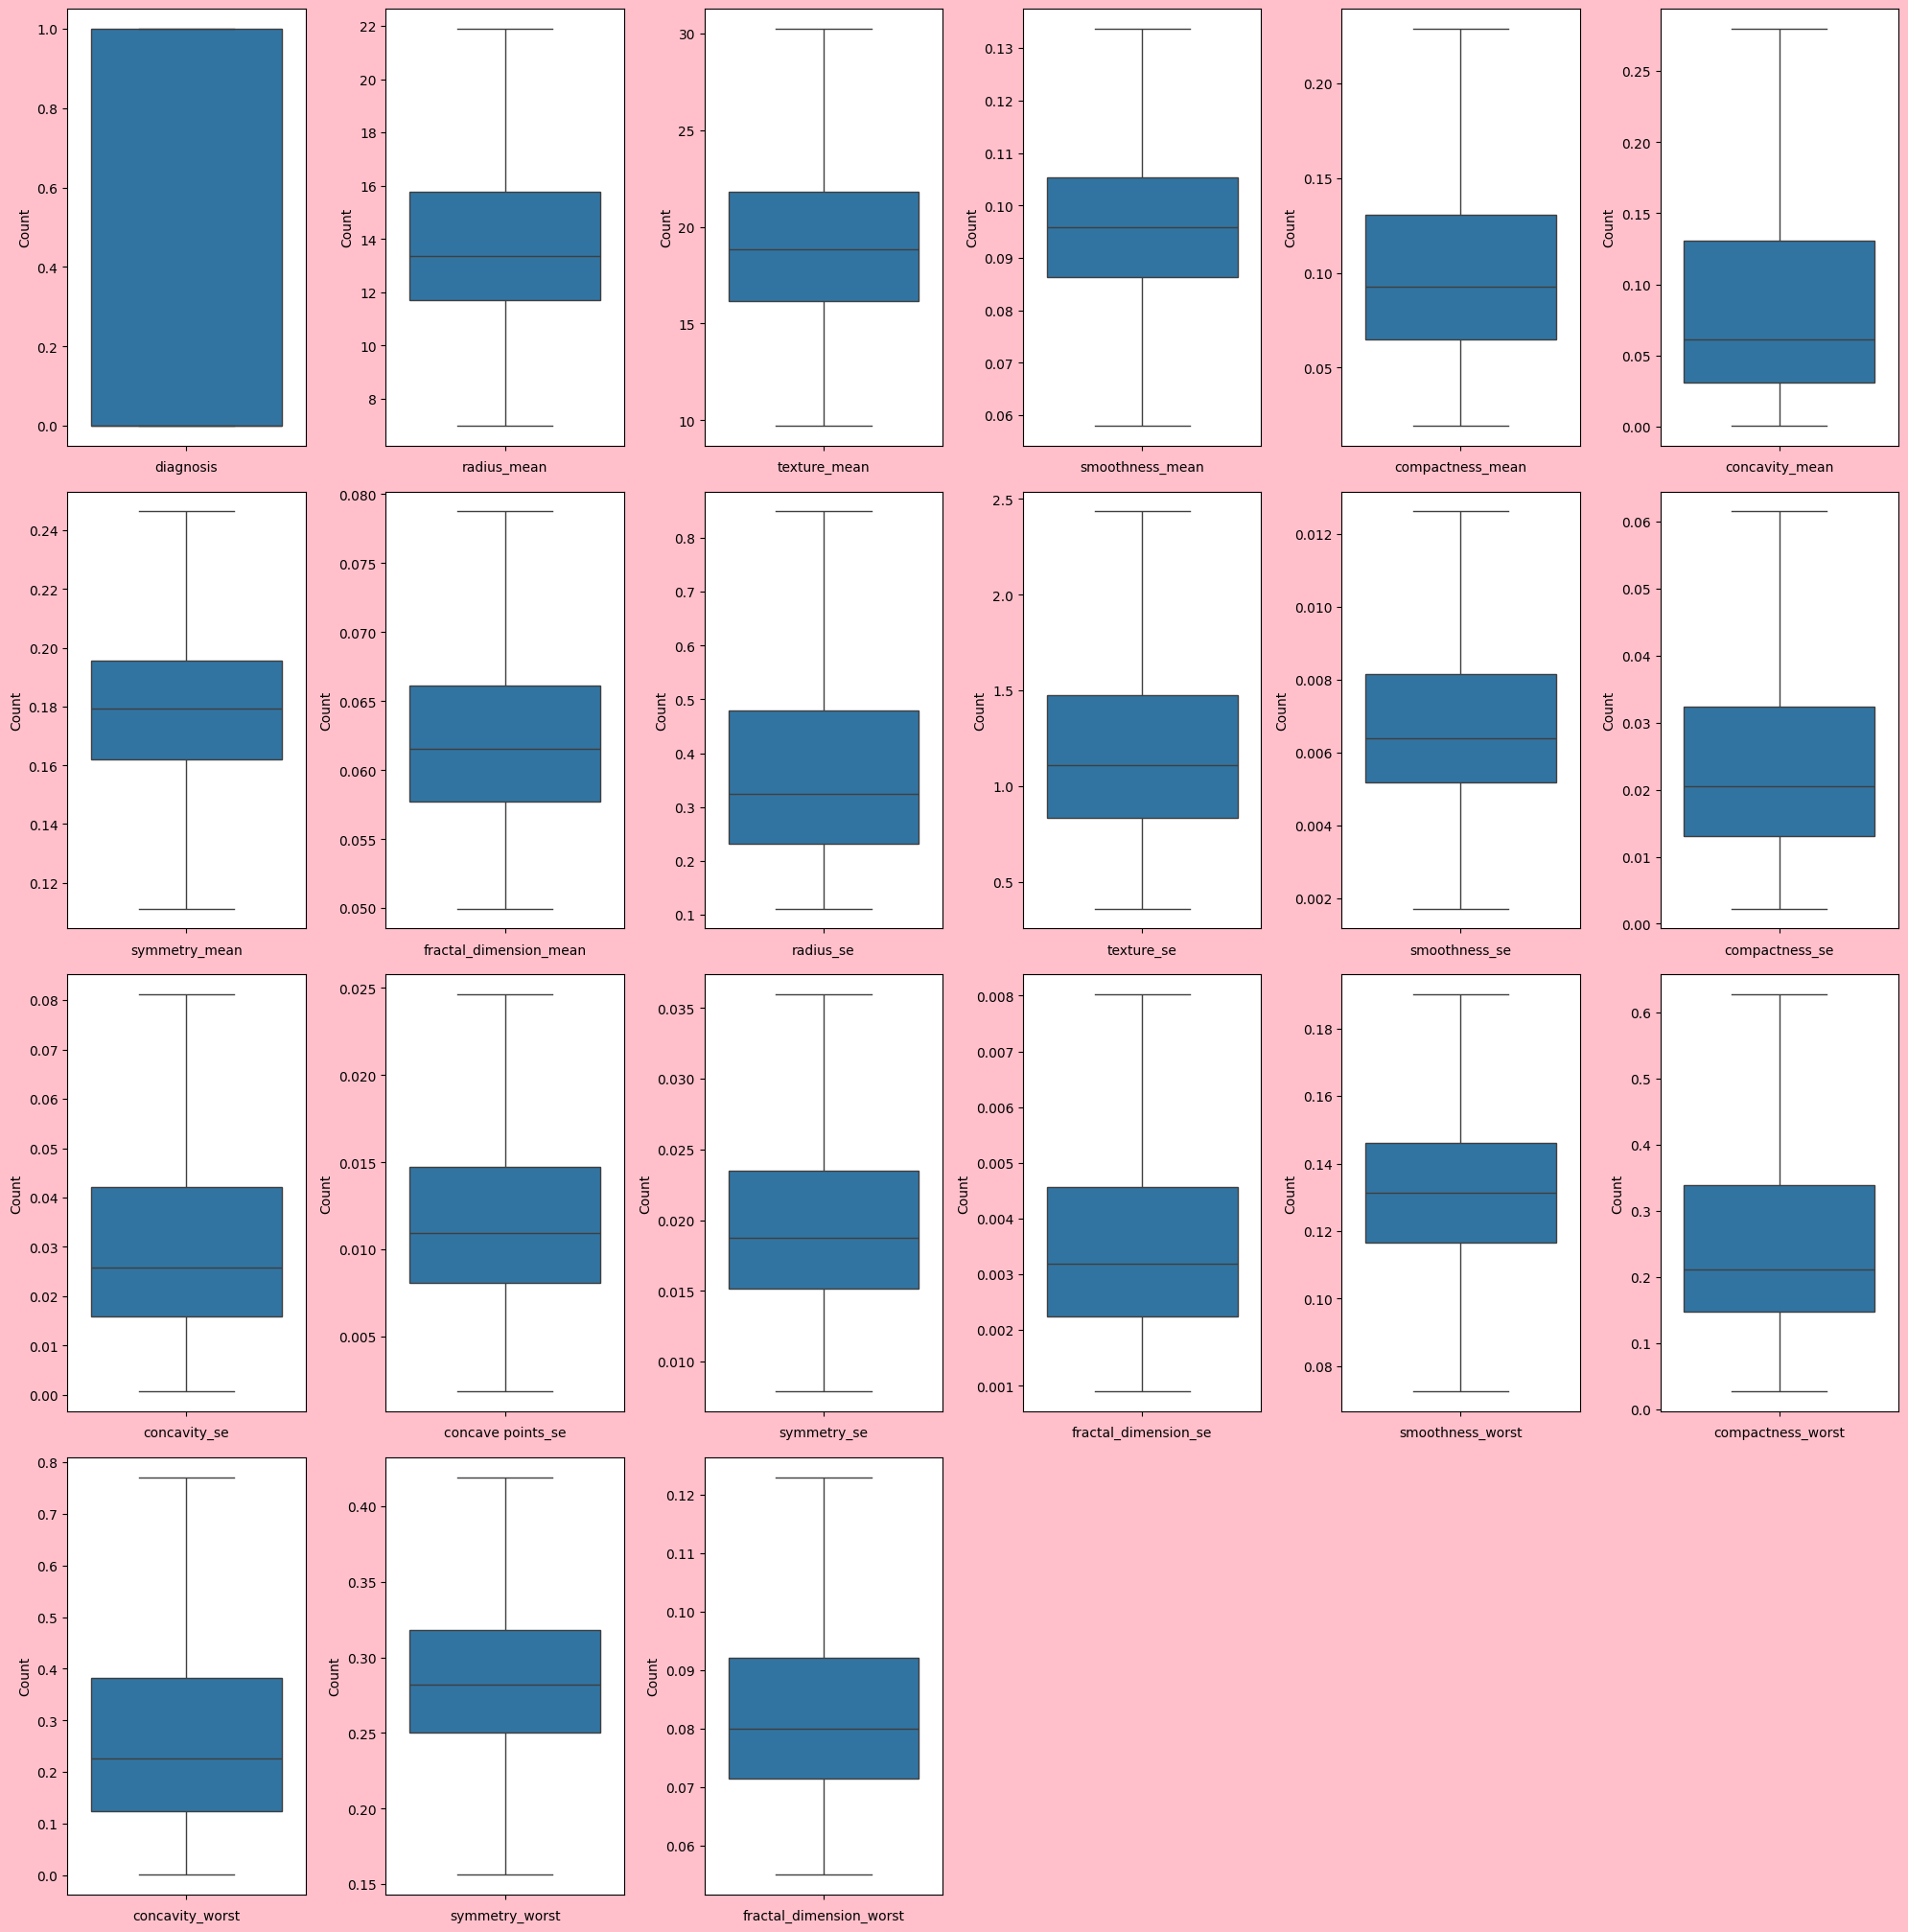

In [101]:
plt.figure(figsize=(20, 25), facecolor='pink')
plotnumber = 1

for column in capped_data:
    if plotnumber<=21:
        ax=plt.subplot(5, 6, plotnumber)
        sns.boxplot(capped_data[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
    plotnumber+=1
plt.tight_layout()

## Model Creation

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Creating Independent and Dependent variable

In [105]:
X = capped_data.drop(columns = ['diagnosis']) # Independent variables
y = capped_data['diagnosis'] # Dependent or target varaible.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [107]:
X_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
287,12.890,13.12,0.06955,0.03729,0.02260,0.1337,0.05581,0.15320,0.4690,0.004731,0.013450,0.016520,0.005905,0.01619,0.002081,0.09616,0.11470,0.11860,0.2309,0.06915
512,13.400,20.52,0.11060,0.14690,0.14450,0.2116,0.07325,0.39060,0.9306,0.005414,0.022650,0.034520,0.013340,0.01705,0.004005,0.15740,0.38560,0.51060,0.3585,0.11090
402,12.960,18.29,0.07351,0.07899,0.04057,0.1874,0.05899,0.23570,1.2990,0.003629,0.037130,0.034520,0.010650,0.02632,0.003705,0.09329,0.23180,0.16040,0.3207,0.07247
446,17.750,28.03,0.09997,0.13140,0.16980,0.1713,0.05916,0.38970,1.0770,0.004714,0.020150,0.036970,0.011100,0.01237,0.002556,0.14010,0.37620,0.63990,0.2972,0.09075
210,20.580,22.14,0.09090,0.13480,0.16400,0.1765,0.05024,0.84865,1.4800,0.008124,0.036110,0.054890,0.024634,0.03176,0.002365,0.11780,0.29200,0.38610,0.2909,0.05865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,0.09783,0.15310,0.08606,0.1902,0.07875,0.52620,0.8522,0.012612,0.061505,0.056710,0.017660,0.02541,0.008023,0.12070,0.24360,0.14340,0.2254,0.10840
106,11.640,18.33,0.11420,0.10170,0.07070,0.1801,0.06520,0.30600,1.6570,0.008540,0.023100,0.029450,0.013980,0.01565,0.003840,0.16880,0.26600,0.28730,0.2806,0.09097
270,14.290,16.82,0.06429,0.02675,0.00725,0.1508,0.05376,0.13020,0.7198,0.003492,0.003710,0.004826,0.003608,0.01536,0.001381,0.08567,0.05036,0.03866,0.2458,0.06120
435,13.980,19.62,0.10600,0.11330,0.11260,0.1669,0.06544,0.22080,0.9533,0.005314,0.017910,0.021850,0.009567,0.01223,0.002846,0.16130,0.35680,0.40690,0.3179,0.10550


In [108]:
X_test

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,0.09965,0.10580,0.08005,0.1925,0.06373,0.3961,1.0440,0.006953,0.019110,0.027010,0.010370,0.01782,0.003586,0.1426,0.2378,0.26710,0.30140,0.08750
70,18.94,21.31,0.09009,0.10290,0.10800,0.1582,0.05461,0.7888,0.7975,0.004444,0.016520,0.022690,0.013700,0.01386,0.001698,0.1193,0.2336,0.26870,0.25510,0.06589
131,15.46,19.48,0.10920,0.12230,0.14660,0.1931,0.05796,0.4743,0.7859,0.006240,0.014840,0.028130,0.010930,0.01397,0.002461,0.1546,0.2394,0.37910,0.28370,0.08019
431,12.40,17.68,0.10540,0.13160,0.07741,0.1811,0.07102,0.1767,1.4600,0.010000,0.032950,0.048610,0.011670,0.02187,0.006005,0.1450,0.2629,0.24030,0.25560,0.09359
540,11.54,14.44,0.09984,0.11200,0.06737,0.1818,0.06782,0.2784,1.7680,0.012150,0.041120,0.055530,0.014940,0.01840,0.005512,0.1345,0.2118,0.17970,0.23290,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,14.64,15.24,0.11320,0.13390,0.09966,0.2116,0.06346,0.5115,0.7372,0.005508,0.044120,0.044360,0.016230,0.02427,0.004841,0.1277,0.3089,0.26040,0.31510,0.08473
199,14.45,20.22,0.09872,0.12060,0.11800,0.1950,0.06466,0.2092,0.6509,0.004044,0.015970,0.020000,0.007303,0.01522,0.001976,0.1552,0.4056,0.49670,0.41915,0.10130
411,11.04,16.83,0.10770,0.07804,0.03046,0.1714,0.06340,0.1967,1.3870,0.005158,0.009355,0.010560,0.007483,0.01718,0.002198,0.1369,0.1482,0.10670,0.29980,0.07881
18,19.81,22.15,0.09831,0.10270,0.14790,0.1582,0.05395,0.7582,1.0170,0.006494,0.018930,0.033910,0.015210,0.01356,0.001997,0.1512,0.3150,0.53720,0.27680,0.07615


In [109]:
y_train

287    0
512    1
402    0
446    1
210    1
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 426, dtype: int64

In [110]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
89     0
199    1
411    0
18     1
390    0
Name: diagnosis, Length: 143, dtype: int64